In [154]:
import numpy as np 
import scipy.ndimage as ndi 
from skimage.io import imread 
import matplotlib.pyplot as plt 
from skimage.filters.thresholding import threshold_otsu
from scipy.ndimage.morphology import binary_fill_holes
from skimage.morphology import skeletonize
from skimage.measure import regionprops

from scipy.ndimage.morphology import distance_transform_edt

from skimage.feature import peak_local_max

import pylab
import math
from pathlib import Path

937 ls  [297.3102456251616, 2.5231325220201604, 10.092530088080641]
1220 ls  [313.99165222578426, 3.742410318509555, 1.5957691216057308, 2.256758334191025, 5.292567428401227, 3.1915382432114616, 2.763953195770684, 2.763953195770684, 2.256758334191025]
563 ls  [343.6743609397672, 8.593479713983122, 4.370193722368317, 2.763953195770684]
84 ls  [263.1108270041268, 7.136496464611085, 1.9544100476116797]
901 ls  [12.309163489997376, 2.763953195770684, 5.641895835477563, 5.292567428401227, 18.91508160359296, 1.9544100476116797, 6.863662517577698, 29.185565874723483, 9.166995688475081, 7.136496464611085, 4.918490759365935, 9.09728368293446, 3.5682482323055424, 327.46722116371416, 12.205286835384658, 5.170882945826411, 5.046265044040321]
154 ls  [313.3685898861661, 2.5231325220201604]
412 ls  [7.898654169668588, 280.3880327853123]
1248 ls  [298.1228155990301]
197 ls  [276.5979352129124]
134 ls  [310.1832030227577]
1159 ls  [303.43750209478605, 8.291859587312052, 1.5957691216057308, 3.191538243

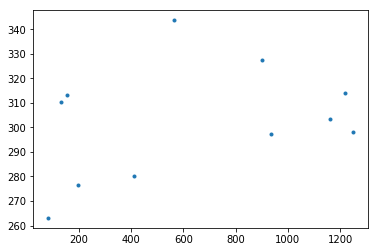

In [163]:

something = np.zeros(1818)
k=0
values = []
times = []
for fn in Path("/home/kamilla/summer_school/summer/Amu").glob("*.png"):
    #print(fn)
    name = str(fn).split("-")[-1]

    
    
    number_of_picture = int(name[:4])
    #print(number_of_picture)
    
    
    
    img = imread(fn)[:,:,0]
    
    
    sigma =3.4
    q = np.percentile(img, [sigma, 100-sigma] )
    img_clipped = img.clip(max = q[1], min = q[0])
    
    img_smooth =  ndi.filters.gaussian_filter(img_clipped, sigma)
    
    
    
    value_for_b =threshold_otsu(img_smooth) 
 
    img_treshhold_obstu_b = img_smooth> value_for_b
    
    img_treshhold_obstu_b = binary_fill_holes(img_treshhold_obstu_b, structure=np.ones((3,3)))
    
    distances = ndi.distance_transform_edt(img_treshhold_obstu_b)
    
    #coordinates = peak_local_max(distances, indices=False)
    
    #skeleton = skeletonize(img_treshhold_obstu_b)
    labels, nlabels = ndi.label(img_treshhold_obstu_b)
    
    
    
    properties = regionprops(labels)
    #print("finded" , len(properties), end = " "  ) ####
    ls = []
    for p in properties:
        min_row, min_col, max_row, max_col = p.bbox
 
        #l = max(max_row - min_row, max_col - min_col)
        #points = np.array(p.coords)
        #dists =  np.sqrt((points[:,0][:,None] - points[:,0][None, :])**2+(points[:,1][:,None] - points[:,1][None, :])**2 )
        
        l = p.equivalent_diameter
        
        ls.append(l )
        
    print(number_of_picture, "ls ", ls)
    something[number_of_picture] = max(ls)
    #print(max(ls), end = " ")
    #print(k, end = " ")
    k=k+1
    times.append(number_of_picture)
    values.append(max(ls))
    if(k>10):
        break
 


    
    #slices = ndi.find_objects(input=labels)
    #print(slices)
    #radii = [np.amax(distances[s]) for s in slices]
    
    #radii = [np.amax(distances[slices[i]]*(labels[slices[i]] == (i+1))) for i in range(nlabels)]
    
 
    #plt.figure( figsize=(14, 14))
    
    
  
    
    #plt.imshow(img_treshhold_obstu_b) 
    
    #plt.imshow(coordinates)
    #plt.imshow(img_smooth, alpha=0.3, cmap = "cool")     
    
    #plt.colorbar()
    #pylab.savefig('vars.png')
    
    #plt.show()
    
plt.plot(times, values, ".")


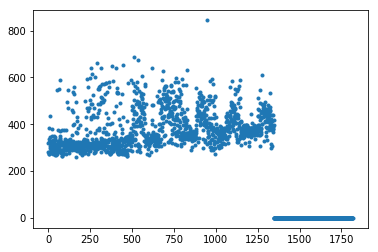

In [165]:
ns = []
for i in range(1818):
    ns.append(i)
    
    
plt.plot(ns, saving, '.')

In [152]:
saving

array([319., 280., 281., ...,   0.,   0.,   0.])

In [151]:
saving = something 

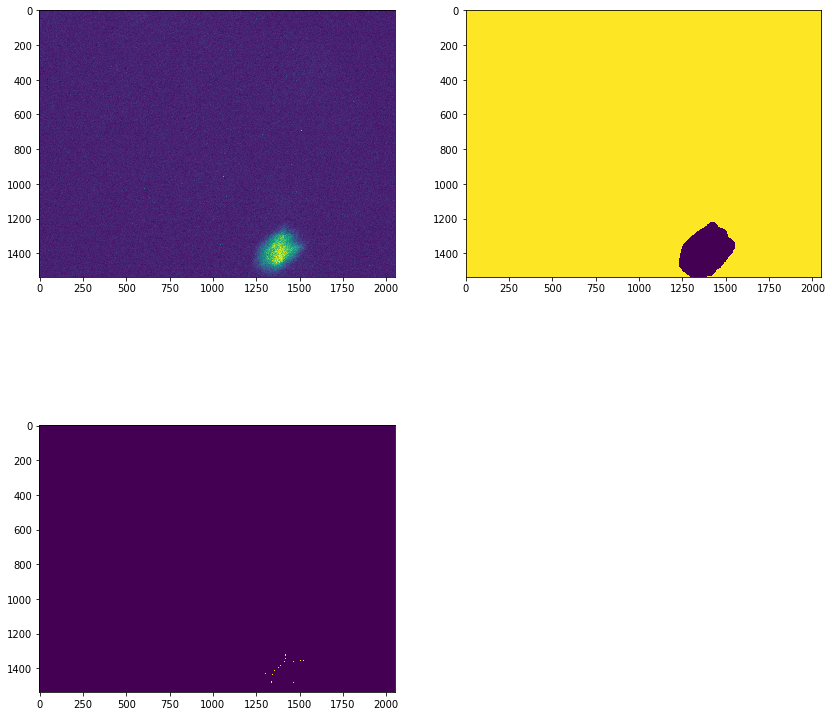

In [123]:
    
    fig = plt.figure( figsize=(14, 14))
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(img) 
    ax2 =  fig.add_subplot(2,2,2)
    ax2.imshow(img_treshhold_obstu_b) 
    
    ax3 =  fig.add_subplot(2,2,3)
    ax3.imshow(skeleton) 
    
    
    pylab.savefig('vars.png')

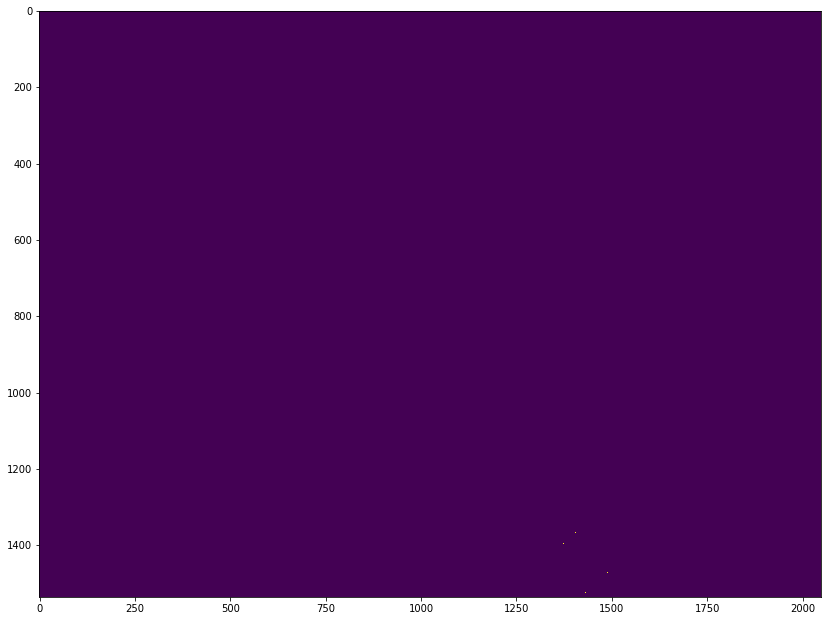

In [50]:
plt.figure( figsize=(14, 14)) 
plt.imshow(coordinates)

In [ ]:
    fig = plt.figure( figsize=(14, 14))
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(distances) 
    ax2 =  fig.add_subplot(2,2,2)
    ax2.imshow(coordinates) 
 
    pylab.savefig('vars.png')